# Controle em Python
Material da disciplina de Modelagem e Controle de Conversores do 
Mestrado em Engenharia Elétrica da Universidade Federal de Santa Maria, 
ministrada pelo **Profº Cassiano Rech** (2/2019).

**Autor:** Tiarles da Rocha Moralles Guterres (Engenheiro de Computação - UFSM)

**Controles:**
* [Proporcional](#slide1)
* [Integral](#slide2)
* [Proporcional-Derivativo](#slide3)

**Bibliotecas de Controle utilizadas:**
* **control:** Biblioteca que implementa a álgebra de blocos para a construção de sistemas.
* **scipy.signal:** Biblioteca que implementa a análise dos sistemas. Essa biblioteca não 
possui algumas funções que aplicam a álgebra de blocos, que é presente em ``control``.

In [ ]:
import control as ctrl
import control.matlab as matlab
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as sig

<a id=slide1></a>
<img src='images/img1.jpg' width=600px/>

In [ ]:
Ks = [.01, .1, 1]

Vg = 100; Vo = 50; L = 250e-6
R = 2; C = 220e-6; f = 50e3

num = [1/L/C]
den = [1, 1/R/C, 1/L/C]

G = Vg * ctrl.tf(num, den)

In [ ]:
# C_Rs = {}

# for K in Ks:
#     tmp_feedback_sys = ctrl.feedback(K * G, 1)
#     num = tmp_feedback_sys.num[0][0]
#     den = tmp_feedback_sys.den[0][0]
#     tmp_TransferFunction = sig.TransferFunction(num, den)
#     C_Rs[K] = {'tf': tmp_TransferFunction,
#                'block': tmp_feedback_sys}
# plot_color = {.01: 'blue', .1: 'green', 1: 'red'}

In [ ]:
t = np.arange(0, .01, 1e-5)
Vo_a = np.ones(t.size) * Vo

# plt.figure(figsize=(12, 6))
# plt.title('Step response of feedback system')
# for K, sys in C_Rs.items():
#     tf = sys['tf']
#     t, y, x = sig.lsim2(tf, Vo_a, t)
#     plt.plot(t, y, label='K = %.2f' % K, color=plot_color[K])
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# t, x, y = sig.lsim(G, Vo, T=t)
# plt.plot(t, y)
%matplotlib qt
ctrl.sisotool(G, kvect=[1, .1, .01])

In [ ]:
%matplotlib inline
ctrl.sisotool(C_Rs[1]['block'], kvect=[1, .1, .01], Hz=True, tvect=t)

In [ ]:
ctrl.sisotool

<a id=slide2></a>
<img src='images/img2.jpg' width=600px/>

In [ ]:
Ks = [5, 15, 25]

Vin = 100; Vo = 50; L = 250e-6
R = 2; C = 220e-6; f = 50e3

num = [1/L/C]
den = [1, 1/R/C, 1/L/C]
s = ctrl.tf([1, 0], [1])

G = Vg * ctrl.tf(num, den)

In [ ]:
C_Rs = {}

for K in Ks:
    tmp_feedback_sys = ctrl.feedback(K/s* G, 1)
    num = tmp_feedback_sys.num[0][0]
    den = tmp_feedback_sys.den[0][0]
    tmp_TransferFunction = sig.TransferFunction(num, den)
    C_Rs[K] = {'tf': tmp_TransferFunction,
               'block': tmp_feedback_sys}
plot_color = {5: 'blue', 15: 'green', 25: 'red'} 

In [ ]:
%matplotlib inline
mpld3.enable_notebook()
# mpld3.diseable_notebook()

t = np.linspace(0, .01, 1000)
plt.figure(figsize=(12, 6))
plt.title('Step response of feedback system')
for K in C_Rs:
    x1, y1 = ctrl.step_response(C_Rs[K], T=t)
    plt.plot(x1, y1, label='K = %.2f' % K, color=plot_color[K])
plt.legend()
plt.grid()
plt.show()

In [ ]:
%matplotlib qt
t = np.linspace(0, .05, 2500)
ctrl.sisotool(C_Rs[5], Hz=True, tvect=t)

<a id=slide3></a>
<img src='images/img3.jpg' width=600px/>

In [ ]:
Ks = [.1, .5, 2.5]

Vin = 100; Vo = 50; L = 250e-6
R = 2; C = 220e-6; f = 50e3

num = [1/L/C]
den = [1, 1/R/C, 1/L/C]
s = ctrl.tf([1, 0], [1])

G = Vin * ctrl.tf(num, den)

C_Rs = {K: ctrl.feedback(K/s*G, 1) for K in Ks}
plot_color = {.1: 'blue', .5: 'green', 2.5: 'red'} 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame([1,1,1,1,2,2,2,2,2], index=[1,2,3,4,5,6,7,8,9], columns=['fundVab'])
for i in df:
    print(i)
    print(df[i])

In [ ]:
s = ctrl.tf([1, 0], [1]); s

In [ ]:
GH = 1/ (s * (s+4) * (s**2 + 4*s + 20)); 2 * GH

In [ ]:
GH = ctrl.tf([1], [1, 8, 36, 80, 0]); GH

In [ ]:
GH = sig.ZerosPolesGain([], [0, -4, -2+4j, -2-4j], 1)
GH = ctrl.tf(GH.to_tf().num, GH.to_tf().den); GH

In [ ]:
%matplotlib qt
# ctrl.pzmap(GH, grid=True)
# ctrl.rlocus(GH, grid=True)
ctrl.sisotool(GH)

In [ ]:
?

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

t = np.linspace(0, 2/60, 2048)
y = 311*np.abs(np.sin(2*np.pi*60*t))
# y = 311*np.sin(2*np.pi*60*t)

plt.plot(t, y)
plt.hlines(y.mean(), t[0], t[-1])
plt.grid()
plt.show()

print(y.max() - y.mean())

In [ ]:
from numpy.fft import fft, fftfreq

Y = np.abs(fft(y)[:y.size//2])/y.size * 2
Y[0] = Y[0]/2
f = fftfreq(y.size, t[1] - t[0])[:y.size//2]
plt.plot(f, Y, 'bo-')
plt.xlim(0, 130)

In [ ]:
f

In [ ]:
s = ctrl.tf([1, 0], [1]); s

In [ ]:
4/(s-1)

In [ ]:
mag, phase, omega = ctrl.bode(1/(.2*s + 1))
# ctrl.bode?

## Aula 12: Projeto de Compensadores
A planta não compensada

In [1]:
import control as ctrl
import numpy as np

L = 50e-6; C = 500e-6; R = 3; Vg = 28

num = [Vg/(L*C)]
den = [1, 1/(R*C), 1/(L*C)]

Gvd = ctrl.tf(num, den)
H = 1/3
Vm = 4

T = Gvd * H * 1/Vm; T


        3.733e+08
------------------------
4 s^2 + 2667 s + 1.6e+08

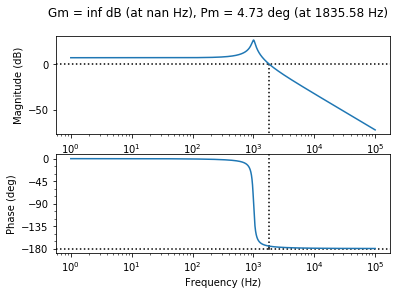

In [2]:
# ctrl.sisotool(T)
mag, phase, omega = ctrl.bode(T, dB=True, omega_limits=(1, 1e5), omega_num=10000, margins=True, Hz=True)

In [3]:
fc = 10e3
theta = 60/180*np.pi

fz = fc * np.sqrt((1 - np.sin(theta))/(1 + np.sin(theta))); print('fz = ', fz)
fp = fc * np.sqrt((1 + np.sin(theta))/(1 - np.sin(theta))); print('fp = ', fp)

s = ctrl.tf([1, 0], [1])
# wz = 2 * np.pi * fz; print('wz ', wz)
# wp = 2 * np.pi * fp; print('wp ', wp)
wz = 2 * np.pi * 2.7e3; print('wz ', wz)
wp = 2 * np.pi * 37.3e3; print('wp ', wp)

Gpd = (1 + s / wz) / (1 + s / wp)

fz =  2679.4919243112276
fp =  37320.50807568876
wz  16964.600329384884
wp  234362.81195779858


In [4]:
fl = fc/10; print('fl ', fl)

wl = 2 * np.pi * fl; print('wl ', wl)
Gc = (1 + wl / s)

fl  1000.0
wl  6283.185307179586


In [9]:
%matplotlib qt

# mag, phase, omega = ctrl.bode(T_closed, dB=True, omega_limits=(1e2, 1e5), omega_num=10000, margins=True, Hz=True)
ctrl.sisotool(T * Gpd * Gc, dB=True, omega_limits=(1, 1e5), omega_num=10000)

c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=7.16541e-22): result may not be accurate.
  return solve(Q, P)


Clicked at -2.253e+05-1.253e+04j gain       1.87 damp     0.9985


c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=4.37069e-22): result may not be accurate.
  return solve(Q, P)


Clicked at -2.185e+05+1.696e+04j gain      3.221 damp      0.997


c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=1.01071e-22): result may not be accurate.
  return solve(Q, P)


Clicked at -2.095e+05+1.696e+04j gain      4.748 damp     0.9967


c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=5.25552e-23): result may not be accurate.
  return solve(Q, P)


Clicked at -1.856e+05 +3.17e+04j gain      8.737 damp     0.9857


c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=1.78851e-23): result may not be accurate.
  return solve(Q, P)


Clicked at -1.782e+05 +3.17e+04j gain       9.63 damp     0.9845


c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=1.49843e-23): result may not be accurate.
  return solve(Q, P)


Clicked at -1.618e+05 +3.17e+04j gain      11.31 damp     0.9813


c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=1.11565e-23): result may not be accurate.
  return solve(Q, P)


Clicked at  -1.48e+05+3.662e+04j gain      12.66 damp     0.9707


c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=9.06257e-24): result may not be accurate.
  return solve(Q, P)


Projeto do PFP

In [ ]:
import control as ctrl
import scipy.signal as sig

In [ ]:
s = ctrl.tf([1, 0], [1])

R = 213.4; C = 680e-6; L = 650e-6; Vo = 40

D_l = [.98, .5, 0]
Gid_l = []

for D in D_l:
    num = Vo/L * (s + 2/R/C)
    den = s**2 + s/R/C + (1-D)**2/L/C

    Gid = num / den
    Gid_l.append(Gid)

In [ ]:
%matplotlib inline
for Gid in Gid_l:
    mag, phase, omega = ctrl.bode(Gid, dB=True, omega_limits=(1, 1e5), margins=True, Hz=True)

num = Vo/L
den = s
Gid = num/den
mag, phase, omega = ctrl.bode(Gid, dB=True, omega_limits=(1, 1e5), margins=True, Hz=True)

In [ ]:
Hi = 1/10
Vm = 5

Gid = num/den * Hi/Vm

mag, phase, omega = ctrl.bode(Gid, omega_limits=(10, 1e6), dB=True, margins=True, Hz=True)

In [ ]:
import numpy as np

fs = 70e3
He = s**2/(np.pi * fs)**2 - s/(2*fs) + 1

Gid = num/den * Hi/Vm * He

%matplotlib inline
mag, phase, omega = ctrl.bode(Gid, omega_limits=(10, 1e6), dB=True, margins=True, Hz=True)

In [ ]:
import numpy as np

theta = 35/180*np.pi
fc = 7e3
fz = fc * np.sqrt((1-np.sin(theta))/(1+np.sin(theta))); fz * 2 * np.pi

In [ ]:
fz = 23400 / 2 / np.pi; fz

In [ ]:
ws = 2*np.pi*fs

pc = ws/2; print('pc ', pc)

In [ ]:
23400/2/np.pi

In [ ]:
F

# Prova 2
Exercício em Aula

In [18]:
import control as ctrl
import numpy as np


  -400
-------
0.005 s



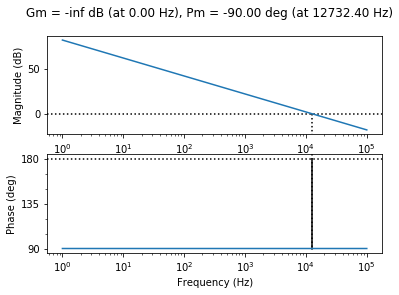

In [27]:
Vdc = 400
Vin_rms = 220 
Lf = 2.5e-3
Cdc = 1000e-6

s = ctrl.tf([1, 0], [1])

Gid = - Vdc / (2* Lf * s); print(Gid)

%matplotlib inline
mag, phase, omega = ctrl.bode(Gid, dB=True, omega_limits=(1, 1e5), omega_num=10000, margins=True, Hz=True)


0.3889
-------
0.001 s



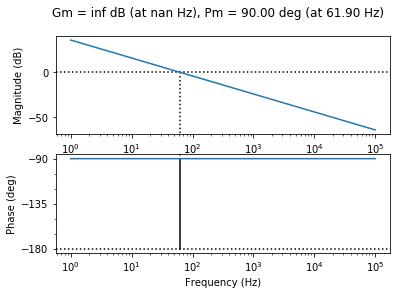

In [26]:
Gvi = np.sqrt(2) * Vin_rms /(2 * Vdc) * 1 / (s * Cdc); print(Gvi)

%matplotlib inline
mag, phase, omega = ctrl.bode(Gvi, dB=True, omega_limits=(1, 1e5), omega_num=10000, margins=True, Hz=True)